# Import Libraries

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly==5.19.0s (from versions: 0.2, 0.3, 0.4, 0.5, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.5.6, 0.5.7, 0.5.8, 0.5.9, 0.5.10, 0.5.11, 0.5.12, 0.5.13, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.0.9, 1.0.10, 1.0.11, 1.0.12, 1.0.13, 1.0.14, 1.0.15, 1.0.16, 1.0.17, 1.0.18, 1.0.19, 1.0.20, 1.0.21, 1.0.22, 1.0.23, 1.0.24, 1.0.25, 1.0.26, 1.0.27, 1.0.28, 1.0.29, 1.0.30, 1.0.31, 1.0.32, 1.0.33, 1.0.34, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.6, 1.2.7, 1.2.8, 1.2.9, 1.3.0, 1.3.1, 1.3.2, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.4.5, 1.4.7, 1.4.9, 1.4.10, 1.4.11, 1.4.12, 1.4.13, 1.4.14, 1.5.0, 1.6.4, 1.6.6, 1.6.7, 1.6.8, 1.6.9, 1.6.10, 1.6.11, 1.6.12, 1.6.13, 1.6.14, 1.6.15, 1.6.16, 1.6.17, 1.6.19, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 1.7.7, 1.7.9, 1.8.0, 1.8.1, 1.8.2, 1.8.3, 1.8.4, 1.8.5, 1.8.6, 1.8.8, 1.8.11, 1.8.12, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.9.4, 1.9.5, 1.9.6, 1.9.7, 

In [2]:
import sys
import os

sys.path.append(os.path.abspath('.'))

In [3]:
from data_preprocessing.data_extractor import DataExtractor
from data_preprocessing.data_transformation import DataTransformer
import logging
import requests
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Extraction

In [4]:
extractor = DataExtractor()
global_sales_df = extractor.fetch_github_data(github_url="https://github.com/eweliwei/Data_Analysis_Engineering_Modeling/blob/main/global_sales.csv")

2025-05-24 22:15:39,659 - Fetching data from GitHub: https://raw.githubusercontent.com/eweliwei/Data_Analysis_Engineering_Modeling/main/global_sales.csv


In [5]:
# View sample records
print(global_sales_df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME           CITY STATE POSTALCODE  \
0    S10_1678         Land of

# Sample Data & Data Exploration

In [6]:
# View total rows and columns
global_sales_df.shape

(2823, 19)

In [7]:
# View sample data
global_sales_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,51100,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,75508,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,Medium


In [8]:
# View data types
global_sales_df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
STATE               object
POSTALCODE          object
COUNTRY             object
DEALSIZE            object
dtype: object

In [9]:
global_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  CITY             2823 non-null   object 
 15  STATE            1337 non-null   object 
 16  POSTALCODE       2747 non-null   object 
 17  COUNTRY       

In [10]:
# Numerical columns
global_sales_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [11]:
# Categorical columns
global_sales_df.describe(include='object')

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE
count,2823,2823,2823,2823,2823,2823,1337,2747,2823,2823
unique,252,6,7,109,92,73,16,73,19,3
top,11/14/2003 0:00,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,Madrid,CA,28034,USA,Medium
freq,38,2617,967,52,259,304,416,259,1004,1384


In [12]:
# Missing Values
print(global_sales_df.isnull().sum())

# Missing values as a percentage
missing_percent = global_sales_df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\n Missing Values (%):")
print(missing_percent)

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
DEALSIZE              0
dtype: int64

 Missing Values (%):
STATE         52.639036
POSTALCODE     2.692171
dtype: float64


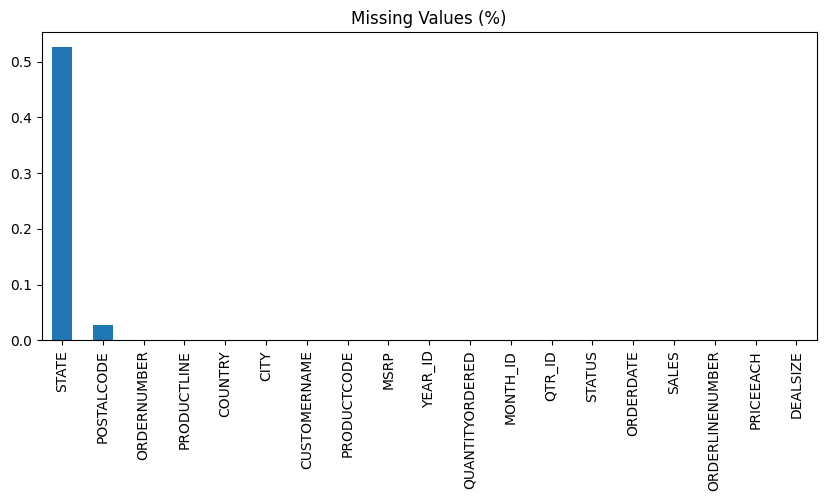

In [13]:
# Visualize missing values
plt.figure(figsize=(10, 4))
global_sales_df.isnull().mean().sort_values(ascending=False).plot.bar()
plt.title("Missing Values (%)")
plt.show()

In [14]:
# Identify Duplcated Records
print(f"\nTotal Duplicates: {global_sales_df.duplicated().sum()}")
print("\nSample Records (if any):")
print(global_sales_df[global_sales_df.duplicated(keep=False)].head())


Total Duplicates: 0

Sample Records (if any):
Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, CITY, STATE, POSTALCODE, COUNTRY, DEALSIZE]
Index: []


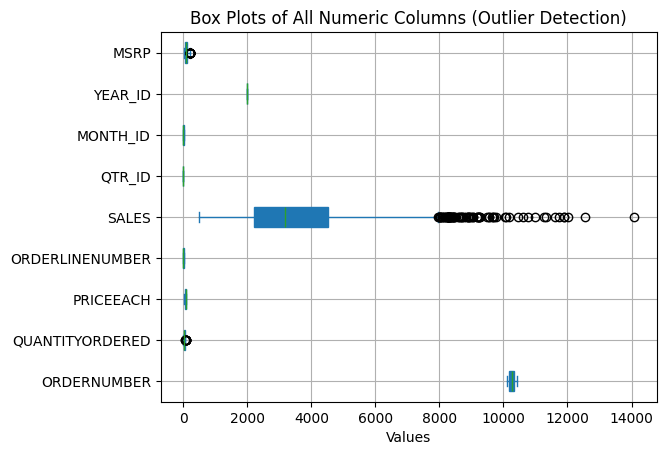

In [15]:
# Identify outliers with boxplots (numerical columns)
global_sales_df.select_dtypes(include=['int64', 'float64']).plot.box(
    vert=False,
    patch_artist=True,
    grid=True
)
plt.title("Box Plots of All Numeric Columns (Outlier Detection)")
plt.xlabel("Values")
plt.show()

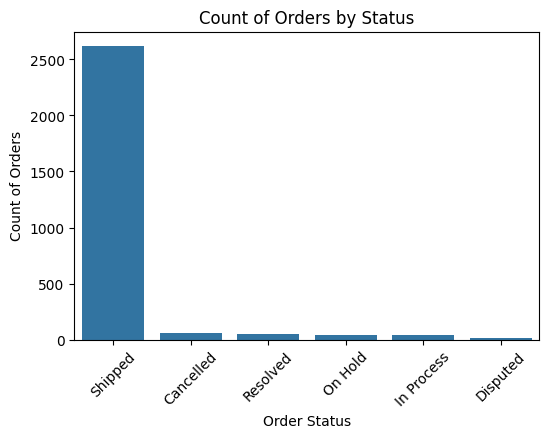

In [16]:
# Count of Orders by Status
status_counts = global_sales_df['STATUS'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Count of Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.show()

# Data Transformation

In [17]:
transformer = DataTransformer(global_sales_df)
transformer.format_column_names_to_snake_case()
transformer.trim_spaces()
transformer.fill_missing_numeric()
transformer.fill_missing_categorical()
transformer.convert_datetime_col(['orderdate'])
transformer.standardize_text_columns(['status'])
cleaned_df = transformer.get_transformed_data()

In [18]:
# View sample data
cleaned_df.head(5).style.set_properties(**{'text-align': 'left'})

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,postalcode,country,dealsize
0,10107,30,95.700000,2,2871.000000,2003-02-24 00:00:00,SHIPPED,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
1,10121,34,81.350000,5,2765.900000,2003-05-07 00:00:00,SHIPPED,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NA,51100,France,Small
2,10134,41,94.740000,2,3884.340000,2003-07-01 00:00:00,SHIPPED,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NA,75508,France,Medium
3,10145,45,83.260000,6,3746.700000,2003-08-25 00:00:00,SHIPPED,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.000000,14,5205.270000,2003-10-10 00:00:00,SHIPPED,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NA,USA,Medium


# Data Analysis & Data Visualization

# How does each variables correlates to each other ?
Key findings:

1. From the heat map below, sales shows strong positive correlations with priceeach (0.66), quantityordered (0.55), and msrp (0.64). This implies that higher unit prices and larger quantities ordered tend to result in higher total sales.
2. Besides, products with a higher Manufacturer's Suggested Retail Price (MRSP) also seem to be associated with higher revenue, indicating that luxury items may contribute significantly to total sales.

2. On the other hand, orderlinenumber exhibits almost no correlation with other variables. If it simply represents the position of an item in an order and doesn't influence or reflect financial metrics like sales or pricing.

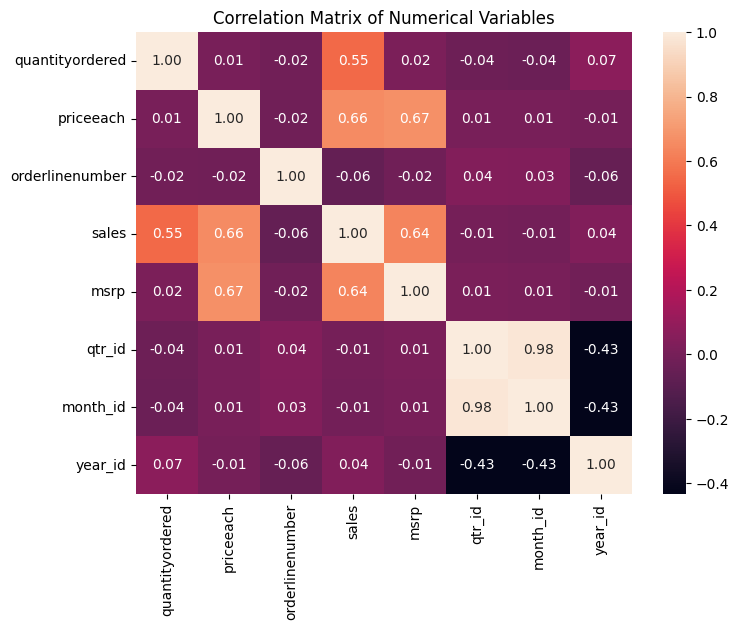

In [19]:
# Correlation heatmap for numerical variables
numeric_cols = ['quantityordered', 'priceeach', 'orderlinenumber', 'sales', 'msrp', 'qtr_id', 'month_id', 'year_id']
corr_matrix = cleaned_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Yearly Sales Over Time
Key Findings:

1. The line plot shows the yearly sales from 2003 to 2005. Sales increased from 2003 to 2004, which suggests that the business was growing, possibly due to successful marketing efforts, expansion, or the introduction of new products or services.
2. However, from 2004 to 2005, sales declined, indicating that the business may have faced certain challenges. This drop could be due to operational inefficiencies, increased competition, a decline in product or service quality, changing customer preferences, economic factors, or poor strategic decisions.

In [20]:
yearly_sales=cleaned_df.groupby(['year_id'])['sales'].sum().reset_index()

print("\nYearly Sales:")
print(yearly_sales)


Yearly Sales:
   year_id       sales
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71


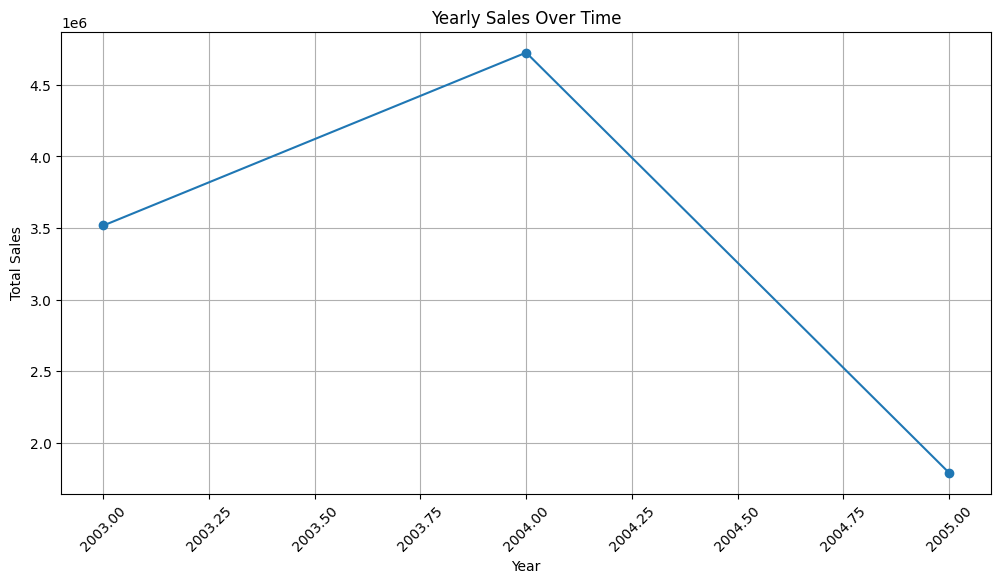

In [21]:
# Sort by year
yearly_sales = yearly_sales.sort_values('year_id')

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year_id'], yearly_sales['sales'], marker='o', linestyle='-')
plt.title('Yearly Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Monthly Sales Over Time
Key Findings:

1. The line plot shows monthly sales trends from 2003 to 2005. Overall, sales appear to be increasing over time, with two noticeable spikes occurring consistently between September and December each year. This recurring pattern suggests that customers tend to shop more during these months.
2. According to the generated statistics, the highest monthly sales were recorded in November 2004, with a sales value of 1089048.01, while the lowest were in January 2003, with a value of 129753. These spikes in sales may be attributed to year-end festive seasons, such as holidays and celebrations, as well as increased spending on home refurbishment during this period.


In [22]:
monthly_sales = cleaned_df.groupby(['year_id','month_id'])['sales'].sum().reset_index()
print("\nTop 10 Monthly Sales:")
print(monthly_sales.head(10))


Top 10 Monthly Sales:
   year_id  month_id      sales
0     2003         1  129753.60
1     2003         2  140836.19
2     2003         3  174504.90
3     2003         4  201609.55
4     2003         5  192673.11
5     2003         6  168082.56
6     2003         7  187731.88
7     2003         8  197809.30
8     2003         9  263973.36
9     2003        10  568290.97


In [23]:
highest_sales = monthly_sales.loc[monthly_sales['sales'].idxmax()]
lowest_sales = monthly_sales.loc[monthly_sales['sales'].idxmin()]

print("Highest Monthly Sales:")
print(highest_sales)

print("Lowest Monthly Sales:")
print(lowest_sales)

Highest Monthly Sales:
year_id        2004.00
month_id         11.00
sales       1089048.01
Name: 22, dtype: float64
Lowest Monthly Sales:
year_id       2003.0
month_id         1.0
sales       129753.6
Name: 0, dtype: float64


In [24]:
min_value = monthly_sales['year_id'].min()
max_value = monthly_sales['year_id'].max()

print("Minimum year_id:", min_value)
print("Maximum year_id:", max_value)


Minimum year_id: 2003
Maximum year_id: 2005


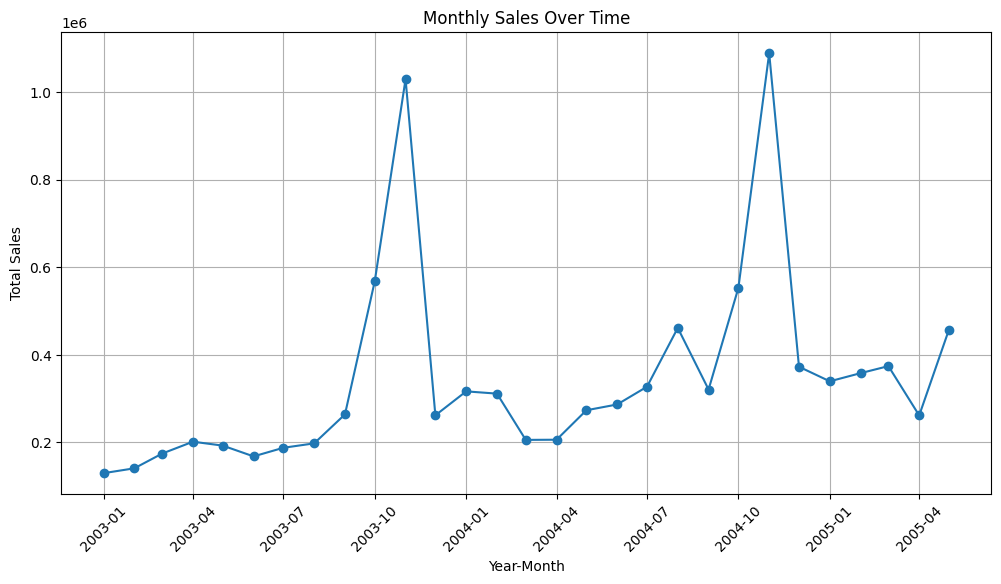

In [25]:
# Concate year and month
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year_id'].astype(str) + '-' + monthly_sales['month_id'].astype(str))

# Sort by date
monthly_sales = monthly_sales.sort_values('year_month')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

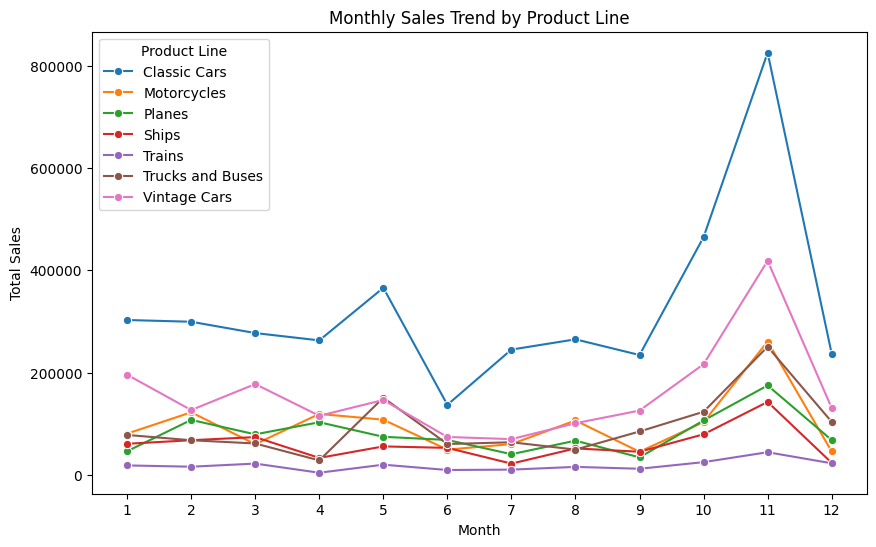

In [26]:
# Monthly Sales Trend by Product Line

monthly_product_sales = cleaned_df.groupby(['productline', 'month_id']).agg({'sales':'sum'}).reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_product_sales, x='month_id', y='sales', hue='productline', marker='o')
plt.title('Monthly Sales Trend by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_product_sales['month_id'].unique())
plt.legend(title='Product Line')
plt.show()

# Global Sales by Country

Key Findings:
1. USA is the dominant market, with over 3.6 million USD in total sales,nearly 3 times more than the next highest country (Spain).

2. European countries (Eg: Spain, France, UK) collectively represent a significant portion of total sales, showing strong demand across the region.

3. Spain edges out France for the #2 spot, suggesting a particularly strong market there that might warrant further focus in marketing or distribution.

4. Followed by Australia and the US indicating substantial sales from English-speaking nations outside the US.

5. Besides, emerging markets like the Philippines and Ireland contribute smaller amounts (~57k–94k USD), but might present growth opportunities.



In [27]:
country = cleaned_df.groupby(['country'])['sales'].sum().reset_index()
# country
short_form = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','IRL','ITA','JPN','NOR','PHL','SGP','ESP','SWE','CHE','GBR','USA']
country['iso_alpha'] = short_form
country

,country,sales,iso_alpha
0,Australia,630623.10,AUS
1,Austria,202062.53,AUT
2,Belgium,108412.62,BEL
3,Canada,224078.56,CAN
4,Denmark,245637.15,DNK
5,Finland,329581.91,FIN
6,France,1110916.52,FRA
7,Germany,220472.09,DEU
8,Ireland,57756.43,IRL
9,Italy,374674.31,ITA


In [28]:
# Sort by date
country = country.sort_values('sales')
country

,country,sales,iso_alpha
8,Ireland,57756.43,IRL
12,Philippines,94015.73,PHL
2,Belgium,108412.62,BEL
16,Switzerland,117713.56,CHE
10,Japan,188167.81,JPN
1,Austria,202062.53,AUT
15,Sweden,210014.21,SWE
7,Germany,220472.09,DEU
3,Canada,224078.56,CAN
4,Denmark,245637.15,DNK


In [29]:
fig = px.choropleth(
    country,
    locations='iso_alpha',
    color='sales',
    scope='world',
    hover_name='country',
    color_continuous_scale='Blues',
)

fig.update_layout(
    title={
        'text': "Global Sales by Country",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar={
        'title': 'Sales Amount',
        'thickness': 20,
        'len': 0.75
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        landcolor='lightgray'
    )
)

fig.show()

# Drilling down into Sales by country and product line
Key Findings:

1. The pivot table reveals that the USA is the dominant market across all product lines, with particularly high sales in Classic Cars, Motorcycles, and
Vintage Cars.
2. Classic Cars emerge as the most popular product overall, with strong performance not just in the USA but also in Spain, France, and Australia.
3. Motorcycles also see robust sales in the USA, France, and Spain, and several countries like Belgium and Denmark report no sales in this category.
4. Planes and Trains show more varied interest, with high numbers in countries like Italy and Spain respectively, but little to no traction in others.
5. Vintage Cars have broad appeal, especially in the USA and Spain, while Trucks and Buses do well in select markets such as the USA and Singapore.
6. European markets like France, Germany, and Italy display balanced demand across categories, while smaller or less represented countries such as Switzerland and the Philippines suggest potential for expansion.

In [30]:
pivot = pd.pivot_table(cleaned_df,
               values='sales',
               index='country',
               columns='productline',
               aggfunc='sum',
               fill_value=0)

In [31]:
pivot

productline,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
country,,,,,,,
Australia,193085.54,89968.76,74853.87,4159.76,1681.35,77318.50,189555.32
Austria,101459.47,26047.66,17860.44,9024.73,0.00,20472.75,27197.48
Belgium,20136.96,0.00,5624.79,31708.01,9017.26,0.00,41925.60
Canada,61623.22,4177.49,25510.07,40309.01,0.00,51945.98,40512.79
Denmark,157182.48,0.00,7586.45,38697.26,11476.33,9588.82,21105.81
Finland,153552.24,47866.72,34375.13,29808.44,5117.05,40479.33,18383.00
France,388951.20,226390.31,108155.51,66486.67,27340.80,116982.22,176609.81
Germany,148315.00,7497.50,23001.26,5501.00,5043.42,10178.00,20935.91
Ireland,31688.82,4953.20,11784.36,0.00,3112.60,3983.05,2234.40


## Putting the above stats into visualization

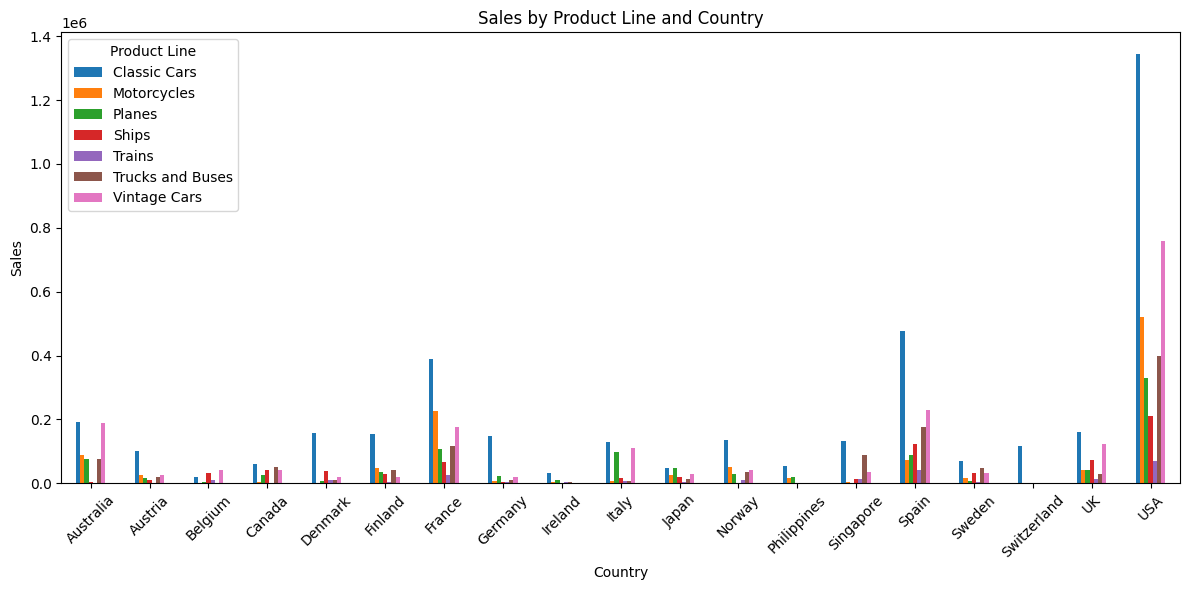

In [32]:
pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Sales by Product Line and Country')
plt.ylabel('Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

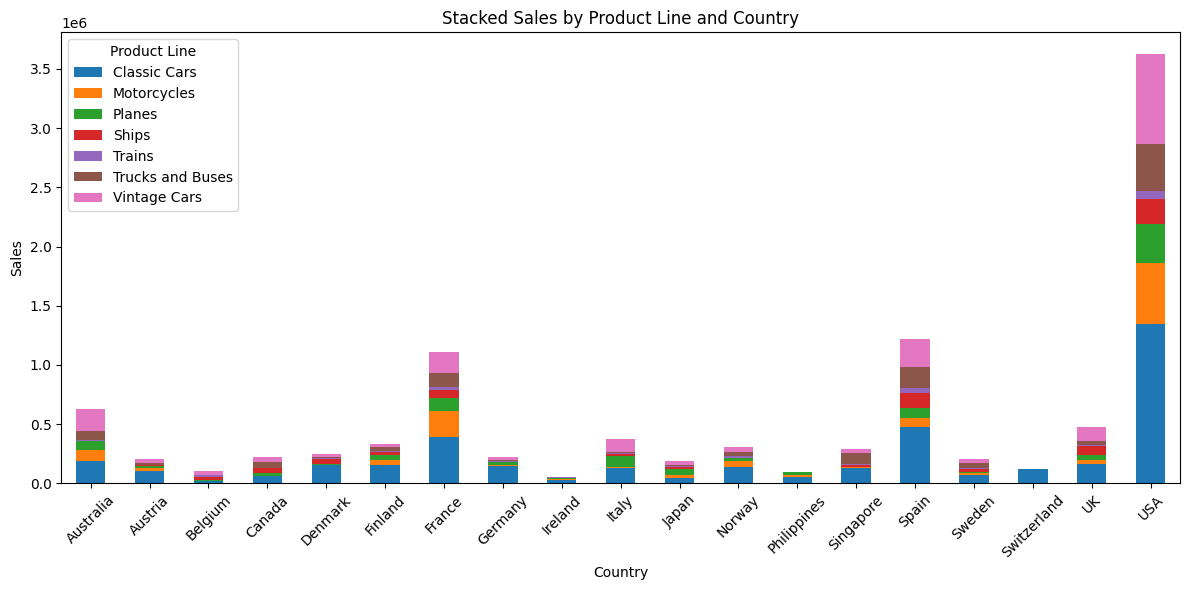

In [33]:
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Sales by Product Line and Country')
plt.ylabel('Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()


# Drilling down to USA
Key Findings:

The sales data reveals that Classic Cars are the most dominant product line in USA, generating approximately 1.34 million, which is nearly double the sales of the next category, Vintage Cars. Together, these two categories account for over 60% of total sales, indicating a strong customer preference or potentially higher pricing strategies.

Motorcycles, Trucks and Buses, and Planes has a moderate sales contributions that suggest room for growth through targeted marketing or promotional strategies.

In contrast, Ships and especially Trains contributing less than 10% of total sales combined, signaling either niche market demand or a need for reevaluation.

In [34]:
usa_df = cleaned_df[cleaned_df['country'] == 'USA']

In [35]:
usa_df.head(5)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,postalcode,country,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,SHIPPED,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
3,10145,45,83.26,6,3746.70,2003-08-25,SHIPPED,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,SHIPPED,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NA,USA,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,SHIPPED,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,CA,94217,USA,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,SHIPPED,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,San Francisco,CA,NA,USA,Small


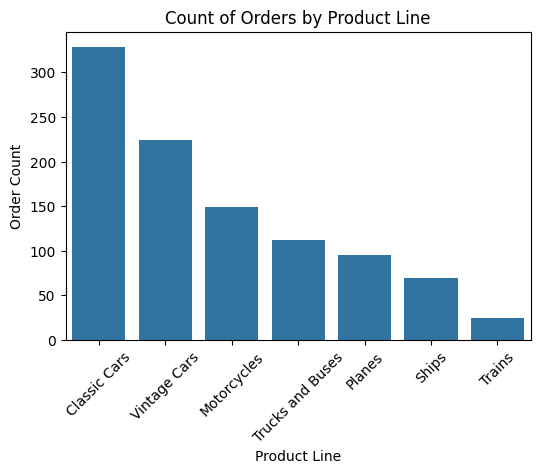

In [36]:
# Count of Orders by Status
productline_counts = usa_df['productline'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=productline_counts.index, y=productline_counts.values)
plt.title('Count of Orders by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
sales_by_productline = usa_df.groupby('productline')['sales'].sum().sort_values(ascending=False)
print(sales_by_productline)

productline
Classic Cars        1344638.22
Vintage Cars         757755.90
Motorcycles          520371.70
Trucks and Buses     397842.42
Planes               328432.89
Ships                209688.14
Trains                69253.56
Name: sales, dtype: float64


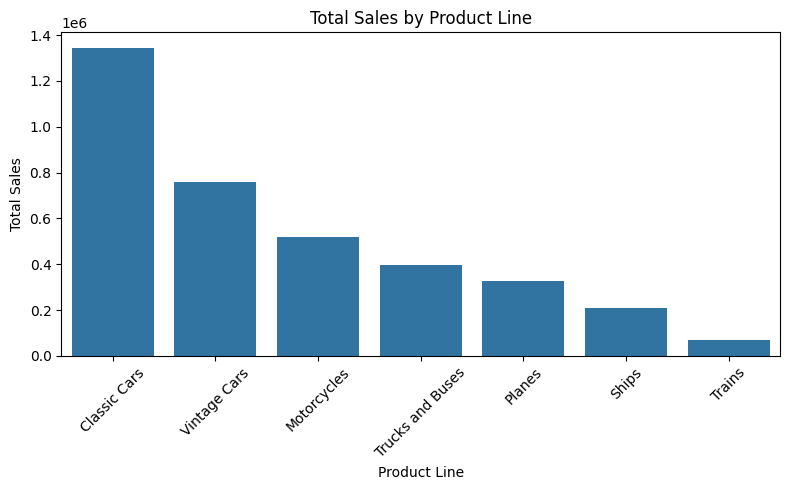

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_productline.index, y=sales_by_productline.values)

plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()